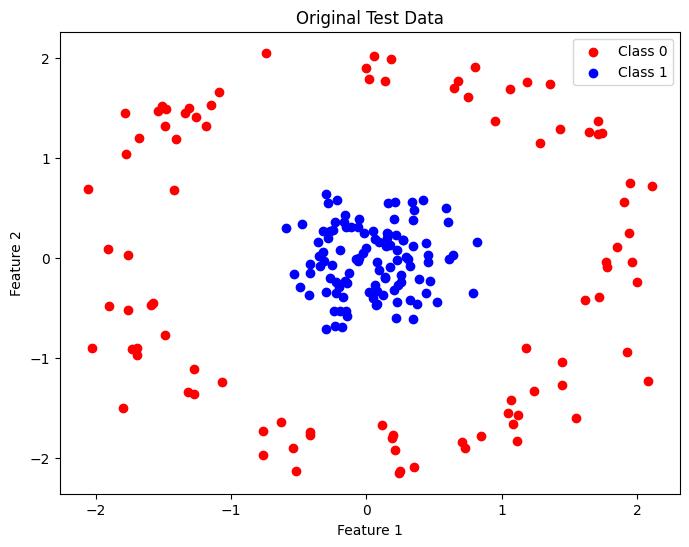

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate a synthetic dataset
x_data, y_data = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=0)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Plot the original test data
plt.figure(figsize=(8, 6))
plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], color='red', label='Class 0')
plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Test Data')
plt.legend()
plt.show()



Accuracy: 0.9700000286102295
6187/6187 [==============================] - 8s 1ms/step


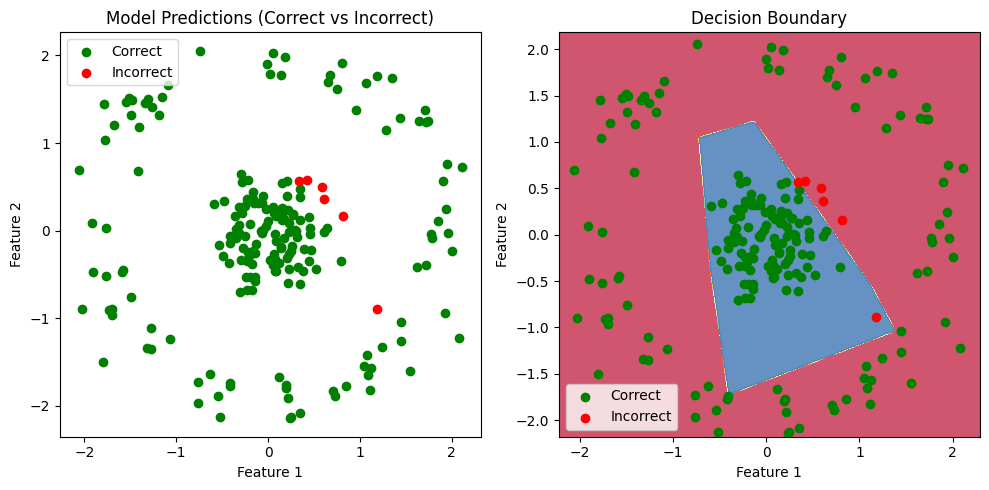

In [34]:
# Build the model
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),  # Hidden layer with 4 neurons and ReLU activation
    Dense(4, activation='relu'),               # Another hidden layer with 4 neurons and ReLU activation
    Dense(1, activation='sigmoid')             # Output layer with 1 neuron and sigmoid activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=50, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy:', accuracy)

# Make predictions
predictions = model.predict(x_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary output

# Determine correct and incorrect predictions
correct_predictions = predictions == y_test.reshape(-1, 1)
incorrect_predictions = predictions != y_test.reshape(-1, 1)

# Plot the original data
plt.figure(figsize=(10, 5))

# Plot correct predictions
plt.subplot(1, 2, 1)
plt.scatter(x_test[correct_predictions.flatten(), 0], x_test[correct_predictions.flatten(), 1], color='green', label='Correct')
plt.scatter(x_test[incorrect_predictions.flatten(), 0], x_test[incorrect_predictions.flatten(), 1], color='red', label='Incorrect')
plt.title('Model Predictions (Correct vs Incorrect)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot decision boundary
plt.subplot(1, 2, 2)
h = 0.01
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
plt.scatter(x_test[correct_predictions.flatten(), 0], x_test[correct_predictions.flatten(), 1], color='green', label='Correct')
plt.scatter(x_test[incorrect_predictions.flatten(), 0], x_test[incorrect_predictions.flatten(), 1], color='red', label='Incorrect')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()
